In [2]:
import numpy as np
import pandas as pd

In [3]:

df = pd.read_csv('spam.csv', encoding='latin1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
390,ham,Huh so late... Fr dinner?,NaN,NaN,NaN
3656,ham,Studying. But i.ll be free next weekend.,NaN,NaN,NaN
611,ham,Its a valentine game. . . Send dis msg to all ...,NaN,NaN,NaN
3113,ham,Yes watching footie but worried we're going to...,NaN,NaN,NaN
5542,ham,Armand says get your ass over to epsilon,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement


## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
4673,ham,I'm leaving my house now.
3369,ham,Most of the tiime when i don't let you hug me ...
1212,ham,"Yo, the game almost over? Want to go to walmar..."
2398,ham,YO YO YO BYATCH WHASSUP?
852,ham,No da if you run that it activate the full ver...


In [10]:
df.rename(columns={'v1': 'Target','v2': 'Text'},inplace=True)

In [11]:
df.sample(5)

,Target,Text
3559,ham,Lol I know! Hey someone did a great inpersonat...
300,ham,"Awesome, I remember the last time we got someb..."
1110,ham,Ok ill tell the company
4830,ham,Po de :-):):-):-):-). No need job aha.
3004,ham,Ew are you one of them?


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
pip install numpy==1.22.4


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip show numpy scipy


Name: numpy
Version: 1.22.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\abhil\sample_project_1\env\lib\site-packages
Requires: 
Required-by: Bottleneck, matplotlib, mkl-fft, mkl-random, numexpr, pandas, scikit-learn, scipy, seaborn, wordcloud, xgboost
---
Name: scipy
Version: 1.7.3
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: c:\users\abhil\sample_project_1\env\lib\site-packages
Requires: numpy
Required-by: scikit-learn, xgboost
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
df['Target']=encoder.fit_transform(df['Target'])

In [17]:
# df['Target']:

#Refers to the Target column in a pandas DataFrame df. This column contains the values that need to be transformed (e.g., categorical labels).
#encoder:

#Represents an instance of an encoding class (e.g., LabelEncoder from sklearn.preprocessing or another encoder). It is used to transform categorical data into numerical format.
#fit_transform:

#Combines the actions of fit and transform:
#fit: Learns the mapping from unique categories in the column to numeric values (e.g., "cat" → 0, "dog" → 1).
#transform: Converts the categories into their respective numeric representations using the mapping learned during fit.

In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [20]:
#check for duplicate values
df.duplicated().sum()

403

In [21]:
df=df.drop_duplicates(keep='first')

In [22]:
df.shape

(5169, 2)

## 2. EDA

In [23]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

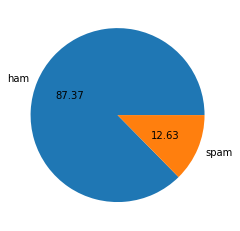

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Data is imbalanced

In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters']=df['Text'].apply(len)

In [29]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
df['num_words']= df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
#counting the number of sentences
df['num_sentences']= df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [36]:
#ham messages
df[df['Target']==0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [37]:
#spam_messages
df[df['Target']==1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


In [39]:
import seaborn as sns
 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

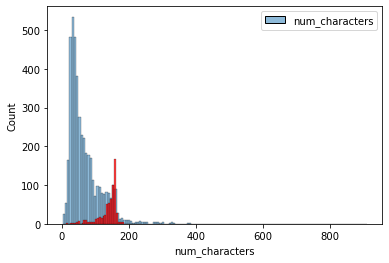

In [40]:
sns.histplot(df[df['Target']==0][['num_characters']])           #extracting ham messages number of characters 
sns.histplot(df[df['Target']==1]['num_characters'],color='red') #extracting spam messages number of characters 

<AxesSubplot:xlabel='num_words', ylabel='Count'>

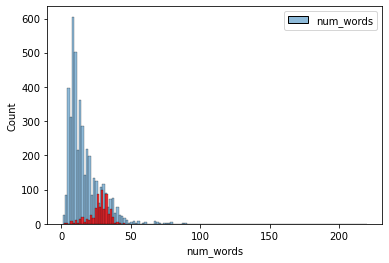

In [41]:
sns.histplot(df[df['Target']==0][['num_words']])           #extracting ham messages number of characters 
sns.histplot(df[df['Target']==1]['num_words'],color='red') #extracting spam messages number of characters 

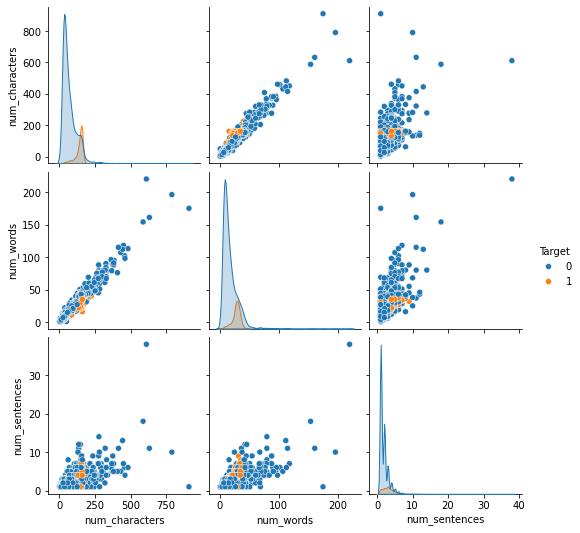

In [42]:
sns.pairplot(df,hue='Target') #It shows relationships between all pairs of features (columns), which is useful for exploring correlations or interactions between different variables in the dataset.

In [43]:
df.corr() #It computes the Pearson correlation coefficient between every pair of numerical columns.

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

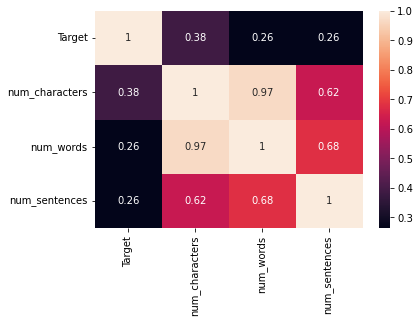

In [44]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
1. Lower case  
2. Tokenization  
3. Removing special characters  
4. Stemming


In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string
string.punctuation


def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
             y.append(i)
                
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
transform_text('How Are yOU %20 Abhi')

'20 danc abhi'

In [47]:
df['transformed_text']=df['Text'].apply(transform_text)

In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [49]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


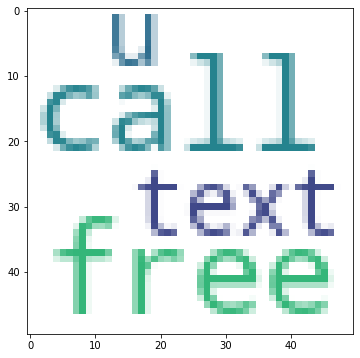

In [50]:


# Generate the word cloud
spam_wc=wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)




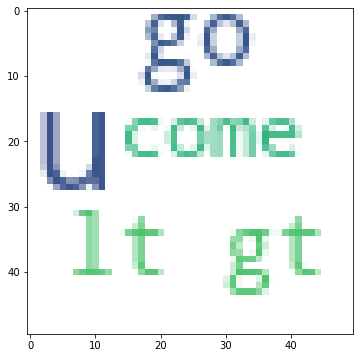

In [51]:
ham_wc=wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [52]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

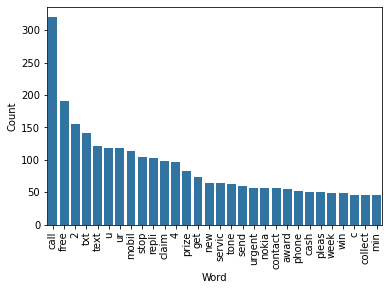

In [56]:
# Count the most common words
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Count"])

# Plot the bar chart
sns.barplot(x="Word", y="Count", data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

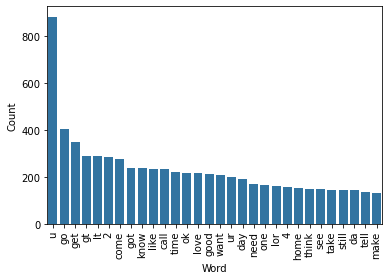

In [58]:
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Count"])

# Plot the bar chart
sns.barplot(x="Word", y="Count", data=common_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [135]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [136]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [137]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [138]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
X.shape

(5169, 3000)

In [140]:
y= df['Target'].values

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [144]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [145]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [146]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [147]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [148]:
#tfidf --> mnb ( because of high precision score )

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [150]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=GradientBoostingClassifier(n_estimators=50, random_state=2)


In [151]:
clfs={
    
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DC': dtc,
    'LRC': lrc,
    'RFC': rfc,
    'Ada': abc,
    'BC': bc,
    'ETC': etc,
    'GBC': gbc,
    'XGB':xgb,
        
    
}

In [152]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy, precision

In [153]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [154]:
accuracy_scores=[]
precision_scores=[]

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy" ,current_accuracy)
    print("Precision", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
Precision 1.0
For NB
Accuracy 0.9709864603481625
Precision 1.0
For DC
Accuracy 0.9294003868471954
Precision 0.8282828282828283
For LRC
Accuracy 0.9584139264990329
Precision 0.9702970297029703
For RFC
Accuracy 0.9758220502901354
Precision 0.9829059829059829


C:\Users\abhil\sample_project_1\env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For Ada
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBC
Accuracy 0.9468085106382979
Precision 0.9191919191919192
For XGB
Accuracy 0.9468085106382979
Precision 0.9191919191919192


In [155]:
import pandas as pd

performance_df_3000 = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_3000': accuracy_scores,
    'Precision_3000': precision_scores
}).sort_values('Precision_3000',ascending=False)

print(performance_df_3000)


   Algorithm  Accuracy_3000  Precision_3000
1         KN       0.905222        1.000000
2         NB       0.970986        1.000000
5        RFC       0.975822        0.982906
0        SVC       0.975822        0.974790
8        ETC       0.974855        0.974576
4        LRC       0.958414        0.970297
6        Ada       0.960348        0.929204
9        GBC       0.946809        0.919192
10       XGB       0.946809        0.919192
7         BC       0.958414        0.868217
3         DC       0.929400        0.828283


In [156]:
print(performance_df_3000.columns)


Index(['Algorithm', 'Accuracy_3000', 'Precision_3000'], dtype='object')


In [157]:
import pandas as pd

# Reshape the DataFrame
performance_df_long = pd.melt(performance_df, id_vars=['Algorithm'], var_name='variable', value_name='value')

# Check the reshaped DataFrame
print(performance_df_long.head())


  Algorithm  variable     value
0        KN  Accuracy  0.905222
1        NB  Accuracy  0.970986
2       RFC  Accuracy  0.975822
3       SVC  Accuracy  0.975822
4       ETC  Accuracy  0.974855


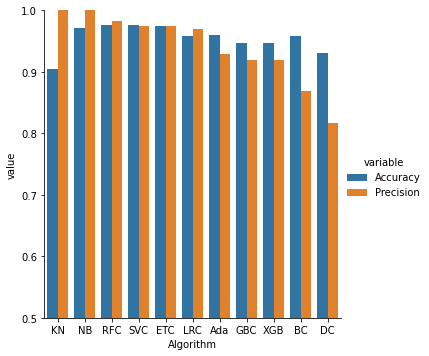

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df_long, kind='bar', height=5)

# Adjust y-axis limits if needed
plt.ylim(0.5, 1)

# Show the plot
plt.show()


In [159]:
# Model Improvement
# 1. Change the max_features parameter of tfidf

In [160]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),
                        'Accuracy_3000':accuracy_scores,
                        'Precision_3000':precision_scores}).sort_values('Precision_3000',ascending=False)

In [161]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_3000_x,Precision_3000_x,Accuracy_3000_y,Precision_3000_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RFC,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LRC,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,Ada,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBC,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,XGB,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [162]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))